<a href="https://colab.research.google.com/github/god-data-unimib/DS_LAB_ECONOMICS_FOR_DS/blob/main/copia_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# DEVE ANDARE SEMPRE QUESTO COMANDO 1 VOLTA
! pip install pycaret

     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 2.0MB 42.7MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 1.4MB 38.1MB/s 
     |████████████████████████████████| 112kB 29.1MB/s 
     |████████████████████████████████| 276kB 38.0MB/s 
     |████████████████████████████████| 6.8MB 49.7MB/s 
     |████████████████████████████████| 174kB 41.3MB/s 
     |████████████████████████████████| 1.7MB 43.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 245kB 40.7MB/s 
     |████████████████████████████████| 14.2MB 47.1MB/s 
     |████████████████████████████████| 1.2MB 21.5MB/s 
     |████████████████████████████████| 1.1MB 35.4MB/s 
     |████████████████████████████████| 3.2MB 33.9M

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.utils import enable_colab
enable_colab()
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from statsmodels.multivariate.manova import MANOVA
import statsmodels.api as sm

Colab mode enabled.


# PRE PROCESSING

In [ ]:
url = 'https://raw.githubusercontent.com/god-data-unimib/DS_LAB_ECONOMICS_FOR_DS/main/dataset1/telecom_users.csv'
df = pd.read_csv(url)
df = df.drop(columns=['customerID', 'Unnamed: 0'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


MAPPING

In [ ]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female':1})
df['Partner'] = df['Partner'].replace({'No': 0, 'Yes':1})
df['Dependents'] = df['Dependents'].replace({'No': 0, 'Yes':1})
df['PhoneService'] = df['PhoneService'].replace({'No': 0, 'Yes':1})
df['MultipleLines'] = df['MultipleLines'].replace({'No': 0, 'Yes':1, 'No phone service' : 3})
df['InternetService'] = df['InternetService'].replace({1: 0, 2: 1, 3: 2})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df['TechSupport'] = df['TechSupport'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df['StreamingTV'] = df['StreamingTV'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'No': 0, 'Yes':1})
df['InternetService'] = df['InternetService'].replace({'No': 0, 'Fiber optic': 1, 'DSL': 2})
df['Contract'] = df['Contract'].replace({'Two year': 0, 'Month-to-month': 1, 'One year': 2})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Credit card (automatic)': 0, 'Bank transfer (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3})
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes':1})

In [ ]:
# tolti na
df = df.dropna()

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   int64  
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   int64  
 3   Dependents        5986 non-null   int64  
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   int64  
 6   MultipleLines     5986 non-null   int64  
 7   InternetService   5986 non-null   int64  
 8   OnlineSecurity    5986 non-null   int64  
 9   OnlineBackup      5986 non-null   int64  
 10  DeviceProtection  5986 non-null   int64  
 11  TechSupport       5986 non-null   int64  
 12  StreamingTV       5986 non-null   int64  
 13  StreamingMovies   5986 non-null   int64  
 14  Contract          5986 non-null   int64  
 15  PaperlessBilling  5986 non-null   int64  
 16  PaymentMethod     5986 non-null   int64  


In [ ]:
# FILL NAN 

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# BUSINESS APPROACH

LINEAR REGRESSION

In [ ]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [ ]:
train.columns

In [ ]:
X = train[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]

y = train['Churn']

In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
predictions = model.predict(X)
model.summary()

In [ ]:
X = train[['SeniorCitizen', 'Dependents', 'tenure','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'TechSupport', 'StreamingTV','StreamingMovies', 
       'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]

y = train['Churn']

In [ ]:
model2 = sm.OLS(y,X).fit()
predictions = model2.predict(X)
model2.summary()

In [ ]:
X = train[['SeniorCitizen', 'tenure','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'TechSupport',
           'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

y = train['Churn']

model3 = sm.OLS(y,X).fit()
predictions = model3.predict(X)
model3.summary()

MANOVA TEST

In [ ]:
maov=MANOVA.from_formula('TotalCharges + MonthlyCharges + StreamingMovies + StreamingTV + PaymentMethod + PaperlessBilling + Contract + StreamingMovies + TechSupport + DeviceProtection + OnlineBackup + OnlineSecurity + InternetService + MultipleLines + PhoneService + tenure + Dependents + Partner + SeniorCitizen + gender ~ Churn', data=train)
print(maov.mv_test())

PYCARET

In [ ]:
exp_clf = setup(df, target = 'Churn')
best = compare_models()

In [ ]:
lr = create_model('nb')
plot_model(lr)

In [ ]:
plot_model(plot='confusion_matrix', estimator=lr) 

In [ ]:
plot_model(plot='learning', estimator=lr) 

In [ ]:
plot_model(plot='error', estimator=lr) 

In [ ]:
plot_model(plot='feature', estimator=lr) 

In [ ]:
 plot_model(plot='pr', estimator=lr) 

In [ ]:
plot_model(plot='dimension', estimator=lr) 

# DATA SCIENCE APPROACH

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, make_scorer
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

### LOGISTIC REGRESSION

In [ ]:
X_LR = train[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]

y_LR = train['Churn']

In [ ]:
X_LR_test = test[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]
y_LR_test = test['Churn']

GRID-SEARCH

In [ ]:
LR_model = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],'C':[0.001,.009,0.01,.09,1,5,10,25, 50, 100]}
grid_clf_acc = GridSearchCV(LR_model, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_LR, y_LR)

grid_clf_acc.best_params_

{'C': 0.001, 'penalty': 'none'}

In [ ]:
LR_model = LogisticRegression(solver = 'liblinear', class_weight='balanced', C=25, penalty = 'l1').fit(X_LR, y_LR, sample_weight=None)

In [ ]:
y_pred_LR = LR_model.predict(X_LR_test)

In [ ]:
y_pred_LR

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
print(classification_report(y_LR_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       895
           1       0.47      0.76      0.58       303

    accuracy                           0.73      1198
   macro avg       0.68      0.74      0.69      1198
weighted avg       0.79      0.73      0.74      1198



In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_LR_test,y_pred_LR)))
print('Precision Score : ' + str(precision_score(y_LR_test,y_pred_LR)))
print('Recall Score : ' + str(recall_score(y_LR_test,y_pred_LR)))
print('F1 Score : ' + str(f1_score(y_LR_test,y_pred_LR)))

#Dummy Classifier Confusion matrix
cm= confusion_matrix(y_LR_test,y_pred_LR)
print('Confusion Matrix : \n' + str(cm))

Accuracy Score : 0.7253756260434057
Precision Score : 0.4731404958677686
Recall Score : 0.7557755775577558
F1 Score : 0.5819567979669631
Confusion Matrix : 
[[640 255]
 [ 74 229]]


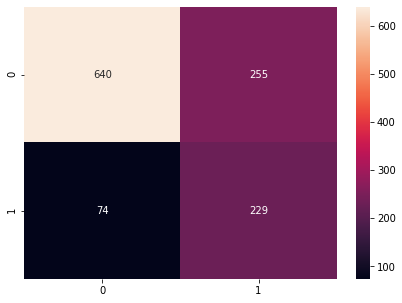

In [ ]:
fig, ax = plt.subplots(figsize=(7,5)) 
sns.color_palette("flare", as_cmap=True)
sns.heatmap(cm,annot=True,fmt='d',ax=ax);

### NAIVE BAYES

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score), 'recall': make_scorer(recall_score)}

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,  # use any cross validation technique 
                 verbose=1,
                 scoring=scoring,
                 refit='recall') 
gs_NB.fit(X_LR, y_LR)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.9s finished


{'var_smoothing': 1.519911082952933e-08}

In [ ]:
NB_model = GaussianNB(var_smoothing=1.519911082952933e-08).fit(X_LR, y_LR)

In [ ]:
y_pred_GNB = NB_model.predict(X_LR_test)

In [ ]:
print(classification_report(y_LR_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.90      0.65      0.75       895
           1       0.43      0.78      0.55       303

    accuracy                           0.68      1198
   macro avg       0.66      0.71      0.65      1198
weighted avg       0.78      0.68      0.70      1198



In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_LR_test,y_pred_GNB)))
print('Precision Score : ' + str(precision_score(y_LR_test,y_pred_GNB)))
print('Recall Score : ' + str(recall_score(y_LR_test,y_pred_GNB)))
print('F1 Score : ' + str(f1_score(y_LR_test,y_pred_GNB)))

#Dummy Classifier Confusion matrix
cm= confusion_matrix(y_LR_test,y_pred_GNB)
print('Confusion Matrix : \n' + str(cm))

Accuracy Score : 0.6803005008347245
Precision Score : 0.427536231884058
Recall Score : 0.7788778877887789
F1 Score : 0.552046783625731
Confusion Matrix : 
[[579 316]
 [ 67 236]]


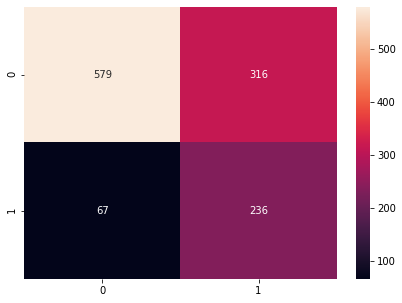

In [ ]:
fig, ax = plt.subplots(figsize=(7,5)) 
sns.color_palette("flare", as_cmap=True)
sns.heatmap(cm,annot=True,fmt='d',ax=ax);